### Q. 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류하는 신경망 모델을 개발 및 평가하세요.
- 데이터 소스 : from keras.datasets import reuters
- 데이터 및 레이블 벡터 변환 : 주어진 사용자 함수 참조
- 모델 구성 : 2개 은닉층(64개 유닛), 1개 출력층
- 성능 개선 : 과대 적합 방지 3개 방법 적용
- 시각화 : Accuracy, Val_Accuracy 비교 시사점 도출
#### 공용 폴더에 제출하세요.(401공유폴더\NLP)
- 파일명 : 이름_평가Score.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 데이터 소스
from keras.datasets import reuters

# 랜덤 시드
np.random.seed(0)

number_of_features = 10000

# 데이터 로드 후 분류
data = reuters.load_data(num_words=number_of_features)
# (data_train, target_vector_train), (data_test, target_vector_test) = data
(x_train, y_train), (x_test, y_test) = data

Using TensorFlow backend.


In [2]:
# x 데이터 원핫인코딩
tokenizer = Tokenizer(num_words=number_of_features)
train_data = tokenizer.sequences_to_matrix(x_train, mode="binary")
test_data = tokenizer.sequences_to_matrix(x_test, mode="binary")


# y 데이터 원핫인코딩
train_target = to_categorical(y_train)
test_target = to_categorical(y_test)

In [3]:
# 모델 생성
model = models.Sequential()
model.add(layers.Dropout(0.1, input_shape=(number_of_features,)))

model.add(layers.Dense(units=64
                         # 가중치 규제 설정
                         , kernel_regularizer=regularizers.l2(0.001)
                         , activation="relu"
                         , input_shape=(number_of_features,)))

model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=64
                         # 가중치 규제 설정
                         , kernel_regularizer=regularizers.l2(0.01)
                         , activation="relu"))

model.add(layers.Dropout(0.1))

model.add(layers.Dense(units=46, activation="softmax"))

# 모델 컴파일
model.compile(loss="categorical_crossentropy"
              , optimizer="adagrad"
              , metrics=["accuracy"])

# 조기 종료  설정
callbacks = [EarlyStopping(monitor="val_loss", patience=2)
             , ModelCheckpoint(filepath="bestm_model.h5", monitor="val_loss", save_best_only=True)]

# 모델 학습
hist = model.fit(
    train_data, train_target
    , epochs=15
    , verbose=1
    , batch_size=1024
    , validation_data=(test_data, test_target)
)

# 훈련&테스트 정확도와 손실
train_acc = hist.history["accuracy"]
test_acc = hist.history["val_accuracy"]

train_loss = hist.history['loss']
test_loss = hist.history['val_loss']

# 에포크 횟수를 사용해 카운트 객체를 만듭니다.
epoch_count = range(1, len(train_acc) + 1)

print()
score = model.evaluate(test_data, test_target)
print('accuracy= ', score[1], 'loss= ', score[0])

Train on 8982 samples, validate on 2246 samples
Epoch 1/15
8982/8982 [==============================] - 2s 172us/step - loss: 3.0839 - accuracy: 0.4260 - val_loss: 2.0990 - val_accuracy: 0.6541
Epoch 2/15
8982/8982 [==============================] - 1s 136us/step - loss: 1.9266 - accuracy: 0.6749 - val_loss: 1.7989 - val_accuracy: 0.7008
Epoch 3/15
8982/8982 [==============================] - 1s 138us/step - loss: 1.6449 - accuracy: 0.7357 - val_loss: 1.6522 - val_accuracy: 0.7346
Epoch 4/15
8982/8982 [==============================] - 1s 136us/step - loss: 1.4872 - accuracy: 0.7673 - val_loss: 1.5759 - val_accuracy: 0.7493
Epoch 5/15
8982/8982 [==============================] - 1s 139us/step - loss: 1.3807 - accuracy: 0.7888 - val_loss: 1.5227 - val_accuracy: 0.7587
Epoch 6/15
8982/8982 [==============================] - 1s 138us/step - loss: 1.3108 - accuracy: 0.8035 - val_loss: 1.4931 - val_accuracy: 0.7565
Epoch 7/15
8982/8982 [==============================] - 1s 136us/step - loss

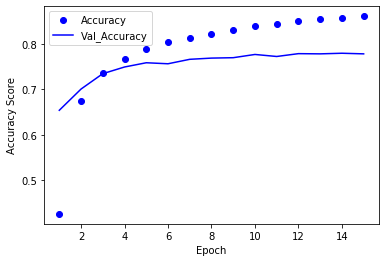

In [4]:
# import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(epoch_count, train_acc, "bo", label="Accuracy")
plt.plot(epoch_count, test_acc, "b", label="Val_Accuracy")

plt.legend(["Accuracy", "Val_Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()
plt.close()

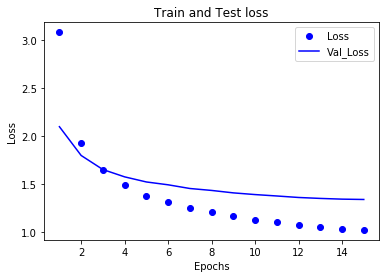

In [5]:
# import matplotlib.pyplot as plt

# 손실 시각화
plt.plot(epoch_count, train_loss, "bo", label='Loss')
plt.plot(epoch_count, test_loss, "b", label='Val_Loss')
plt.title('Train and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()